In [29]:
# Import library yang dibutuhkan
import pandas as pd

# Proses ekstraksi data
raw_data = pd.read_csv('D:/Full Stack Bangalore/telecom_customer_churn.csv')

# Display data
display(raw_data)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [2]:
# Banyak data
print(f'Banyak record : {raw_data.shape[0]}')
print(f'Banyak kolom  : {raw_data.shape[1]}')

Banyak record : 7043
Banyak kolom  : 38


In [3]:
# Mengakses informasi umum pada data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [4]:
# Copy raw data to another variable
data = raw_data.copy()

# Transformasi nama kolom menjadi lowercase
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')

# Drop some columns
data = data.drop(columns = ['zip_code',	'latitude',	'longitude'])

# Periksa kembali 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   city                               7043 non-null   object 
 6   number_of_referrals                7043 non-null   int64  
 7   tenure_in_months                   7043 non-null   int64  
 8   offer                              3166 non-null   object 
 9   phone_service                      7043 non-null   object 
 10  avg_monthly_long_distance_charges  6361 non-null   float64
 11  multiple_lines                     6361 non-null   objec

In [5]:
# Memastikan tidak ada customer id yang duplikat
total_dupl_custid = data['customer_id'].duplicated().sum()

# Tampilkan hasilnya
print(f'Total data duplikat pada customer id = {total_dupl_custid}')

Total data duplikat pada customer id = 0


# Quest 1 - Descriptive Analytics

### Bagaimana status customer saat ini ?

In [6]:
# Hitung total data (unik) customer id per status customernya
cust_status = data.groupby(['customer_status'], as_index = False).agg(total_cust_status = ('customer_id', pd.Series.nunique))

# Tampilkan hasilnya
display(cust_status)

,customer_status,total_cust_status
0,Churned,1869
1,Joined,454
2,Stayed,4720


Karena ingin diketahui proporsi status masing-masing customer maka Visualisasi data dengan Pie Chart merupakan salah satu pilihan yang tepat. Pie chart digunakan untuk memperlihatkan bagaimana proporsi statis suatu nilai terhadap keseluruhan nilai total

In [7]:
import plotly.express as px

fig = px.pie(
    cust_status, 
    values = 'total_cust_status', 
    names = 'customer_status',
    #hover_data = ['total_cust_status'], 
    labels = {
        'customer_status' : 'Customer Status',
        'total_cust_status' : 'Total Customer'
    },
    color = 'customer_status',
    color_discrete_map = {
        'Churned' : '#ff0000',
        'Stayed' : '#5bb450',
        'Joined' : '#72bf6a'                                 
    }
)

fig.update_traces(
    textposition = 'inside', 
    textinfo = 'percent+label',
    pull = [0.1, 0, 0]
)


fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    showlegend = False,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    paper_bgcolor = 'rgba(0, 0, 0, 0)'
)

fig.show()

# Quest 2 - Diagnostics Analytics

### Alasan terbesar customer churn ?

In [8]:
# Hitung total data cust
cust_churn_category = data.groupby(['churn_category', 'churn_reason'], as_index = False).agg(total_cust_churn_per_reason = ('customer_id', pd.Series.nunique))

cust_churn_category['total_cust_churn_per_category'] = cust_churn_category.groupby(['churn_category'], as_index = False)['total_cust_churn_per_reason'].transform(sum)

cust_churn_category = cust_churn_category.sort_values(
    by = ['total_cust_churn_per_category', 'total_cust_churn_per_reason'], 
    ascending = True,
    ignore_index = True
)
             
# Tampilkan hasilnya
display(cust_churn_category)

,churn_category,churn_reason,total_cust_churn_per_reason,total_cust_churn_per_category
0,Other,Deceased,6,182
1,Other,Moved,46,182
2,Other,Don't know,130,182
3,Price,Lack of affordable download/upload speed,30,211
4,Price,Extra data charges,39,211
5,Price,Long distance charges,64,211
6,Price,Price too high,78,211
7,Attitude,Attitude of service provider,94,314
8,Attitude,Attitude of support person,220,314
9,Dissatisfaction,Poor expertise of phone support,12,321


In [9]:
cust_churn_category['index_largest'] = cust_churn_category.sort_values(['total_cust_churn_per_reason'], ascending = False) \
             .groupby(['churn_category']) \
             .cumcount() + 1
             
cust_churn_category['index_largest'] = ['largest' if x == 1 else '' for x in cust_churn_category['index_largest']]

cust_churn_category['text'] = cust_churn_category['churn_reason'] + '<br> (' + cust_churn_category['total_cust_churn_per_reason'].astype(str) + ')'


cust_churn_category

,churn_category,churn_reason,total_cust_churn_per_reason,total_cust_churn_per_category,index_largest,text
0,Other,Deceased,6,182,,Deceased<br> (6)
1,Other,Moved,46,182,,Moved<br> (46)
2,Other,Don't know,130,182,largest,Don't know<br> (130)
3,Price,Lack of affordable download/upload speed,30,211,,Lack of affordable download/upload speed<br> (30)
4,Price,Extra data charges,39,211,,Extra data charges<br> (39)
5,Price,Long distance charges,64,211,,Long distance charges<br> (64)
6,Price,Price too high,78,211,largest,Price too high<br> (78)
7,Attitude,Attitude of service provider,94,314,,Attitude of service provider<br> (94)
8,Attitude,Attitude of support person,220,314,largest,Attitude of support person<br> (220)
9,Dissatisfaction,Poor expertise of phone support,12,321,,Poor expertise of phone support<br> (12)


In [10]:
import plotly.express as px

long_df = px.data.medals_long()

fig = px.bar(
    cust_churn_category, 
    x = "total_cust_churn_per_reason", 
    y = "churn_category", 
    color = "index_largest", 
    color_discrete_map = {
        'largest' : '#ff0000',
        '' : '#ba403d'
    },
    orientation = 'h',
    text = "text"
)

fig.update_layout(
    autosize = False,
    width = 1700,
    height = 500,
    showlegend = False,
    xaxis = dict(
        title = "",
        zeroline=False,
        showgrid = False,
        side = 'top'
    ),
    yaxis = dict(
        title = '',
        visible = True, 
        showticklabels = True,
        showgrid = False
    ),
    font = dict(
        size=9
    ),
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    paper_bgcolor = 'rgba(0, 0, 0, 0)'
)

hovertemplate = '<b>%{y}</b><br>'\
                '%{text}<br>'
                
fig.update_traces(
    hovertemplate = hovertemplate, 
    customdata = cust_churn_category["churn_reason"]
)


fig.show()

# Quest 3 

### Alasan terbesar customer churn ?

In [11]:
# Hitung total data (unik) customer id per status customernya
revenue_per_status = data.groupby(['customer_status'], as_index = False).agg(total_revenue = ('total_revenue', pd.Series.sum))

# Tampilkan hasilnya
display(revenue_per_status)

,customer_status,total_revenue
0,Churned,3684459.82
1,Joined,54279.75
2,Stayed,17632392.12


(0.0, 1.0, 0.0, 1.0)

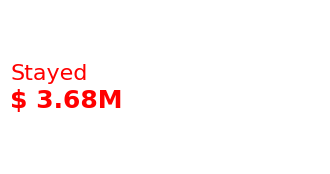

In [28]:
import matplotlib.pyplot as plt

revenue_churn = revenue_per_status[revenue_per_status['customer_status'] == 'Churned']['total_revenue'].values[0] / 10**6
joined_churn = revenue_per_status[revenue_per_status['customer_status'] == 'Joined']['total_revenue'].values[0] / 10**6
stayed_churn = revenue_per_status[revenue_per_status['customer_status'] == 'Stayed']['total_revenue'].values[0] / 10**6

revenue_churn = round(revenue_churn, 2)
joined_churn = round(joined_churn, 2)
stayed_churn = round(stayed_churn, 2)

fig, [ax1, ax2] = plt.subplots(
    nrows = 2, 
    ncols = 1,
    figsize = (4, 2)
)

ax1.text(
    x = 0, 
    y = 0, 
    s = 'Stayed',
    color = '#ff0000',
    fontsize = 16,
    fontweight = 'light',
)

ax2.text(
    x = 0, 
    y = 0.8, 
    s = '$ ' + str(revenue_churn) + 'M',
    color = '#ff0000',
    fontsize = 18,
    fontweight = 'semibold'
)

ax1.axis('off')
ax2.axis('off')


In [55]:
import plotly.express as px

fig = px.histogram(
    data[data['gender'] == 'Female'], 
    x = "age",
    nbins = 10,
    color_discrete_sequence=['#5bbc95']
)

fig.update_layout(
    autosize = False,
    width = 500,
    height = 400,
    bargap = 0.02,
    showlegend = False,
    xaxis = dict(
        title = "",
        zeroline=False,
        showgrid = False
    ),
    yaxis = dict(
        title = '',
        visible = True, 
        showticklabels = True,
        showgrid = False
    ),
    font = dict(
        size=9
    ),
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    paper_bgcolor = 'rgba(0, 0, 0, 0)'
)

fig.show()

In [54]:
import plotly.express as px

fig = px.histogram(
    data[data['gender'] == 'Male'], 
    x = "age",
    nbins = 10,
    color_discrete_sequence=['#5bbc95']
)

fig.update_layout(
    autosize = False,
    width = 500,
    height = 400,
    bargap = 0.02,
    showlegend = False,
    xaxis = dict(
        title = "",
        zeroline=False,
        showgrid = False
    ),
    yaxis = dict(
        title = '',
        visible = True, 
        showticklabels = True,
        showgrid = False
    ),
    font = dict(
        size=9
    ),
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    paper_bgcolor = 'rgba(0, 0, 0, 0)'
)

fig.show()

,gender,married,married_per_gender
0,Female,No,1800
1,Female,Yes,1688
2,Male,No,1841
3,Male,Yes,1714


In [66]:
import plotly.express as px

married_per_gender = data.groupby(['gender', 'married'], as_index = False).agg(married_per_gender = ('customer_id', pd.Series.nunique))

fig = px.pie(
    married_per_gender, 
    values = 'married_per_gender', 
    names = 'married',
    #hover_data = ['total_cust_status'], 
    labels = {
        'married' : 'is Married?',
        'married_per_gender' : 'Total Customer'
    },
    color = 'married',
    color_discrete_map = {
        'Yes' : '#ff0000',
        'No' : '#5bb450'                                
    },
    hole = 0.5
)

fig.update_traces(
    textposition = 'inside', 
    textinfo = 'percent+label',
    pull = [0.01, 0]
)


fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    showlegend = False,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    paper_bgcolor = 'rgba(0, 0, 0, 0)'
)

fig.show()

In [237]:
categorical_col = data.select_dtypes(include=['category', 'object']).columns
categorical_col = list(categorical_col)

data[categorical_col]

,customer_id,gender,married,city,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,...,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,customer_status,churn_category,churn_reason
0,0002-ORFBO,Female,Yes,Frazier Park,NaN,Yes,No,Yes,Cable,No,...,Yes,No,No,Yes,One Year,Yes,Credit Card,Stayed,NaN,NaN
1,0003-MKNFE,Male,No,Glendale,NaN,Yes,Yes,Yes,Cable,No,...,No,Yes,Yes,No,Month-to-Month,No,Credit Card,Stayed,NaN,NaN
2,0004-TLHLJ,Male,No,Costa Mesa,Offer E,Yes,No,Yes,Fiber Optic,No,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,Yes,Martinez,Offer D,Yes,No,Yes,Fiber Optic,No,...,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,Yes,Camarillo,NaN,Yes,No,Yes,Fiber Optic,No,...,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,No,La Mesa,Offer D,Yes,No,Yes,DSL,Yes,...,No,No,Yes,Yes,One Year,No,Credit Card,Stayed,NaN,NaN
7039,9992-RRAMN,Male,Yes,Riverbank,Offer D,Yes,Yes,Yes,Fiber Optic,No,...,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,No,Elk,Offer E,Yes,No,Yes,DSL,No,...,No,No,No,Yes,Month-to-Month,Yes,Credit Card,Joined,NaN,NaN
7041,9993-LHIEB,Male,Yes,Solana Beach,Offer A,Yes,No,Yes,Cable,Yes,...,No,Yes,Yes,Yes,Two Year,No,Credit Card,Stayed,NaN,NaN


In [233]:
numerical_col = data.select_dtypes(include=['int', 'float']).columns
numerical_col = list(numerical_col)

data[numerical_col]

,age,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,37,0,93225,34.827662,-118.999073,2,9,42.39,16.0,65.60,593.30,0.00,0,381.51,974.81
1,46,0,91206,34.162515,-118.203869,0,9,10.69,10.0,-4.00,542.40,38.33,10,96.21,610.28
2,50,0,92627,33.645672,-117.922613,0,4,33.65,30.0,73.90,280.85,0.00,0,134.60,415.45
3,78,0,94553,38.014457,-122.115432,1,13,27.82,4.0,98.00,1237.85,0.00,0,361.66,1599.51
4,75,0,93010,34.227846,-119.079903,3,3,7.38,11.0,83.90,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,20,0,91941,32.759327,-116.997260,0,13,46.68,59.0,55.15,742.90,0.00,0,606.84,1349.74
7039,40,0,95367,37.734971,-120.954271,1,22,16.20,17.0,85.10,1873.70,0.00,0,356.40,2230.10
7040,22,0,95432,39.108252,-123.645121,0,2,18.62,51.0,50.30,92.75,0.00,0,37.24,129.99
7041,21,0,92075,33.001813,-117.263628,5,67,2.12,58.0,67.85,4627.65,0.00,0,142.04,4769.69
